## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [115]:
from sympy import *
#from sympy.physics.matrices import mdft
from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot, plot3d_parametric_line

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [4]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [5]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [6]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [7]:
init_printing ()


In [8]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [9]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [10]:
def K(_gamma):
    return H - I*D(_gamma)

In [11]:
K(2*sqrt(2))

⎡0    1  ⎤
⎢        ⎥
⎣1  -√2⋅ⅈ⎦

In [12]:
K(2*sqrt(2)).eigenvects()

⎡⎛                ⎡⎡   -1    ⎤⎤⎞  ⎛              ⎡⎡    -1     ⎤⎤⎞⎤
⎢⎜                ⎢⎢─────────⎥⎥⎟  ⎜              ⎢⎢───────────⎥⎥⎟⎥
⎢⎜  √2   √2⋅ⅈ     ⎢⎢√2   √2⋅ⅈ⎥⎥⎟  ⎜√2   √2⋅ⅈ     ⎢⎢  √2   √2⋅ⅈ⎥⎥⎟⎥
⎢⎜- ── - ────, 1, ⎢⎢── + ────⎥⎥⎟, ⎜── - ────, 1, ⎢⎢- ── + ────⎥⎥⎟⎥
⎢⎜  2     2       ⎢⎢2     2  ⎥⎥⎟  ⎜2     2       ⎢⎢  2     2  ⎥⎥⎟⎥
⎢⎜                ⎢⎢         ⎥⎥⎟  ⎜              ⎢⎢           ⎥⎥⎟⎥
⎣⎝                ⎣⎣    1    ⎦⎦⎠  ⎝              ⎣⎣     1     ⎦⎦⎠⎦

In [13]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [14]:
def U():
    return lambda t: exp(-I*H*t)

In [15]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [16]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [17]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

New period

In [18]:
2*pi / (sqrt(2)/2)

Components are either pure real or pure imaginary:

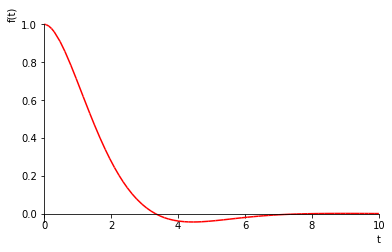

In [19]:
plot(re(non_unitary_psi(t)[0]), (t, 0, 10), line_color='r')

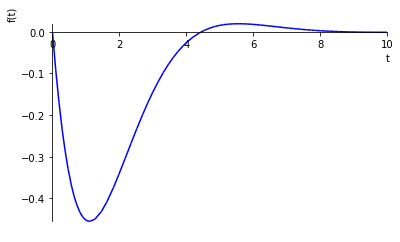

In [20]:
plot(im(non_unitary_psi(t)[1]), (t, 0, 10), line_color='b')

In [21]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

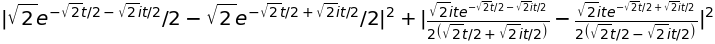

In [22]:
lossy_norm(t)

In [23]:
non_unitary_psi_n = lambdify(t, non_unitary_psi(t), "numpy")

In [24]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [25]:
def non_unitary_psi_renorm_n(_t):
    return non_unitary_psi_n(_t) / np.sqrt(lossy_norm_n(_t))

In [26]:
T = np.linspace(1e-16, 10, 2000)

Text(0.5, 0, 't')

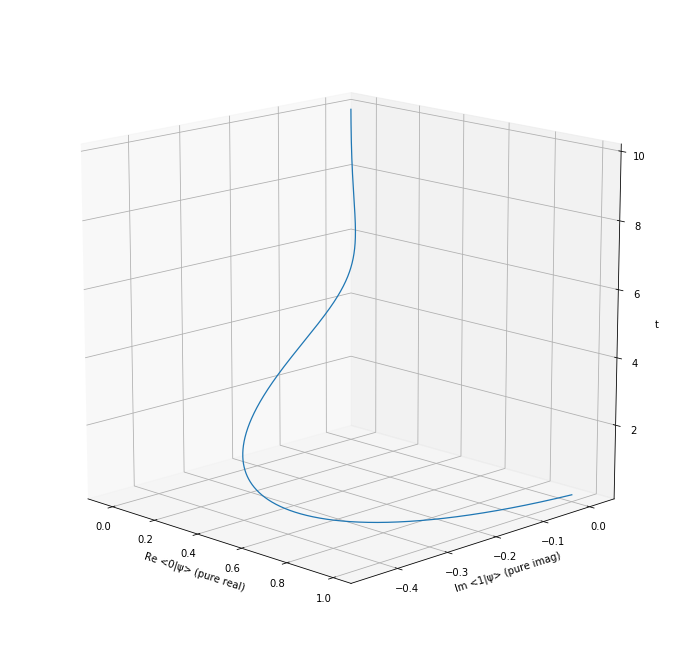

In [27]:
fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')
ax.view_init(15,-45) # rotate 3d point of view

ax.plot(
    np.real(non_unitary_psi_n(T)[0][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
    linewidth=1.25
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


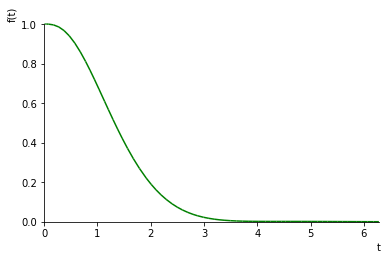

In [28]:
plot(lossy_norm(t),(t, 0, 2*pi), line_color='g')

In [29]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [30]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

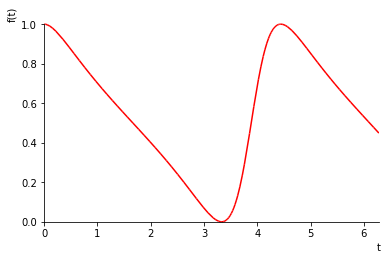

In [31]:
plot(prob_0_detect(t),(t, 0, 2*pi), line_color='r')

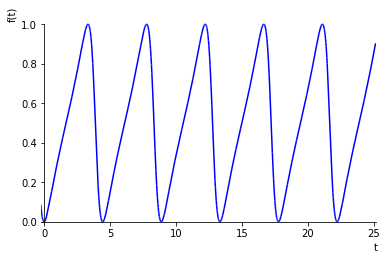

In [32]:
plot(prob_1_detect(t),(t, -0.25, 8*pi), line_color='b')

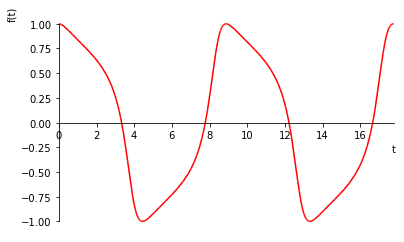

In [33]:
plot(re(non_unitary_psi(t)[0])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='r')

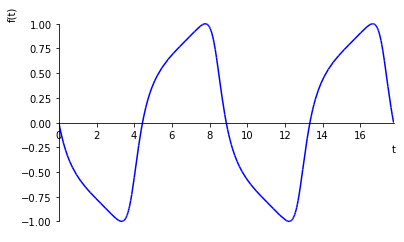

In [34]:
plot(im(non_unitary_psi(t)[1])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi), line_color='b')

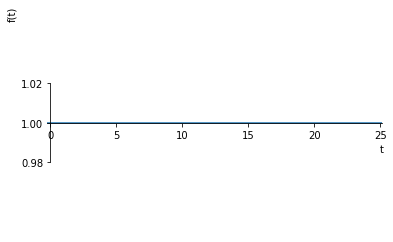

In [35]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

In [36]:
#plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [37]:
#plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [38]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [39]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

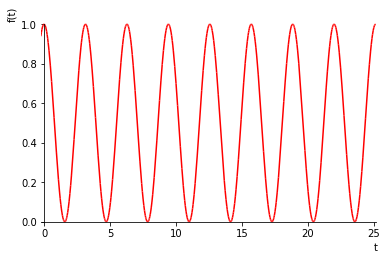

In [40]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi), line_color='r')

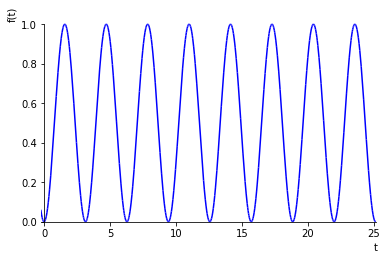

In [41]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi), line_color='b')

In [42]:
lossy_norm_n(2)

In [43]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [44]:
Y = lossy_norm_n(X)

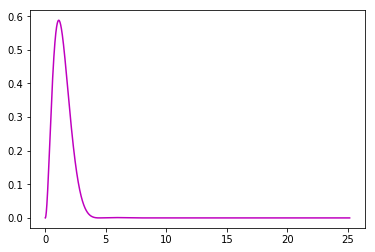

In [45]:
plt.plot(X, -np.gradient(Y, X), 'm')

In [46]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(3/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [47]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [48]:
hatpsisquarednorm(-1)

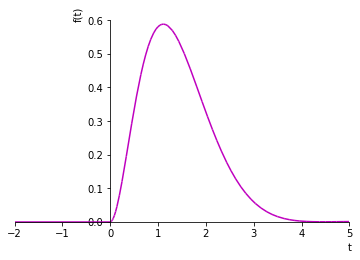

In [49]:
plot(hatpsisquarednorm(t), (t, -2, 5), line_color='m')

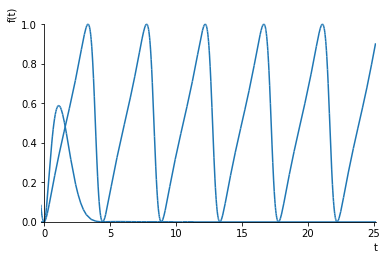

In [50]:
plot(prob_1_detect(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [51]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [52]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

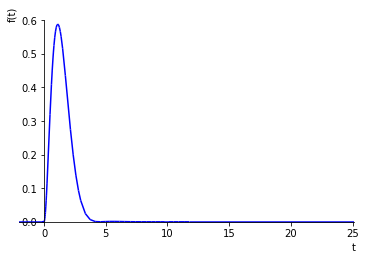

In [53]:
plot( abs(hatpsi(t)[1]**2), (t, -2, 8*pi), line_color='b')

In [54]:
im(hatpsi(t)[1])

In [55]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

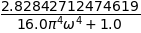

In [56]:
abs(fhatpsi1(omega))**2

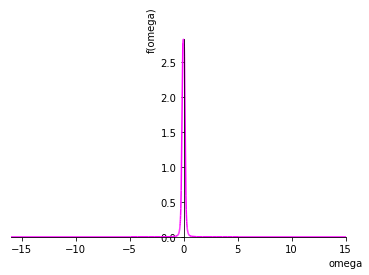

In [57]:
plot(abs(fhatpsi1(omega))**2, (omega, -16, 15), line_color='magenta')

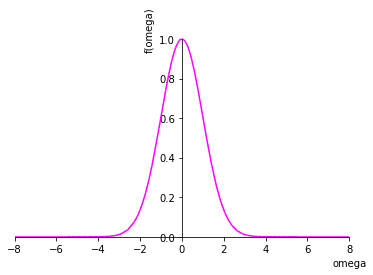

In [58]:
# compare with a gaussian
plot(
    exp(-(omega**2)/2), (omega, -8, 8), 
    line_color='magenta'
)

## (Discrete) Page-Wootters model

In [59]:
from scipy.linalg import dft, norm, expm
from scipy import stats

In [60]:
T = np.diag(np.arange(0,32)) * np.pi / 16

In [61]:
# The NumPy Fourier matrix is the conjugate of Mathematica's one,
# hence the trailing .conj() 
F = dft(32, scale='sqrtn').conj()

In [62]:
F_dagger = F.conj().T

In [63]:
Omega = F @ T @ F_dagger * 16 / np.pi

In [64]:
oeigenvalues, oeigenvectors = np.linalg.eig(Omega)

In [65]:
np.round(oeigenvalues)

array([31.-0.j, -0.-0.j, 30.-0.j,  1.-0.j, 29.-0.j,  2.-0.j, 28.+0.j,
        3.+0.j, 27.+0.j,  4.+0.j, 26.+0.j,  5.+0.j, 25.-0.j,  6.-0.j,
       24.-0.j, 23.+0.j,  7.-0.j, 22.+0.j,  8.+0.j, 21.-0.j,  9.+0.j,
       20.-0.j, 10.+0.j, 19.+0.j, 18.-0.j, 11.+0.j, 17.+0.j, 16.+0.j,
       12.+0.j, 15.-0.j, 14.+0.j, 13.-0.j])

In [66]:
H = np.array([
    [0, 1],
    [1, 0]
])

In [67]:
D = np.array([
    [0, 0],
    [0, np.sqrt(2)]
])

In [68]:
K = H - 1j*D

In [69]:
K

array([[0.+0.j        , 1.+0.j        ],
       [1.+0.j        , 0.-1.41421356j]])

In [70]:
J = np.kron(Omega, np.eye(2)) + np.kron(np.eye(32), K)

In [71]:
eigenvalues, eigenvectors = np.linalg.eig(J)

In [72]:
EnergyCorrectionMatrices = np.zeros((64, 64, 64), np.complex)
for n in range(64):
    EnergyCorrectionMatrices[n] = np.kron(
        expm(-1j*eigenvalues[n]*T),
        np.eye(2)
    )

In [73]:
def history_vector(eigenindex):
    # Needs matrix transposition ".T" (different convention as opposed to Mathematica)
    eigenvector = eigenvectors.T[eigenindex]
    return EnergyCorrectionMatrices[eigenindex] @ eigenvector

# "unflatten" the history_vector v into a a sequence of qubit component pairs
def reshape(v):
    return np.reshape(v, (-1,2))

# also make the first component real
def normalize_initial(v):
    vout = np.zeros(64, np.complex)
    # A phase factor to make it real
    vout = v * np.exp(-1j * np.angle(v[0]))
    # And a factor to normalize the initial state
    vout = vout / sqrt(
        np.abs(vout[0]**2) + np.abs(vout[1]**2)
    )
    return vout

In [74]:
# Find the best linear combination to obtain |0> as initial state
def find_best():
    max_prob0 = 0
    max_prob0_i = 0
    max_prob0_j = 0
    for i in range(32):
        for j in range(32):
            qbi = reshape(history_vector(i))
            qbj = reshape(history_vector(j))
            qbit_hist = qbi + qbj
            prob0 = np.abs(qbit_hist[0][0]**2) / (
                np.abs(qbit_hist[0][0]**2) + np.abs(qbit_hist[0][1]**2)
            )
            if prob0 > max_prob0:
                max_prob0 = prob0
                max_prob0_i = i
                max_prob0_j = j
    print (max_prob0_i, max_prob0_j, max_prob0)
    return (max_prob0_i, max_prob0_j)
    

In [75]:
# start with |0> as close as possible
i, j = find_best()
qbhistvec = normalize_intial(history_vector(i) + history_vector(j))
qbhist = reshape(qbhistvec) 

2 7 1.0


In [76]:
qbhist = qbhist.astype(complex)

Consitently with "odinary QM" findings, the component along |0> stays purely real, and the component along |1> stays purely imaginary.

In [77]:
# Fill data for plotting
times = np.arange(0, 2*np.pi, np.pi/16)
norms = np.zeros(32)
probs0 = np.zeros(32)
probs1 = np.zeros(32)
# Components 0 are pure real, componets 1 are pure imag
real_parts0 = np.real(qbhist.T[0])
imag_parts1 = np.imag(qbhist.T[1])

for i in range(0, 32):
    norms[i] = (np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2))
    probs0[i] = np.abs(qbhist[i][0]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )
    probs1[i] = np.abs(qbhist[i][1]**2) / (
        np.abs(qbhist[i][0]**2) + np.abs(qbhist[i][1]**2) )

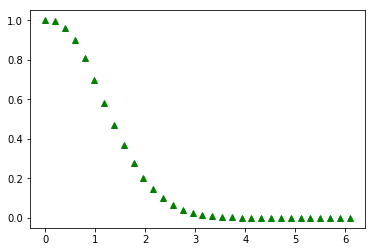

In [78]:
plt.plot(times, norms/norms[0], 'g^')

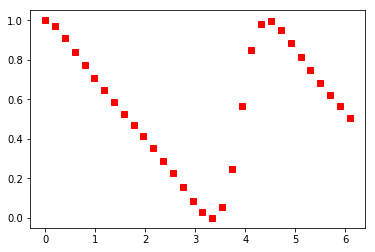

In [79]:
plt.plot(times, probs0, 'rs')

Text(0.5, 0, 't')

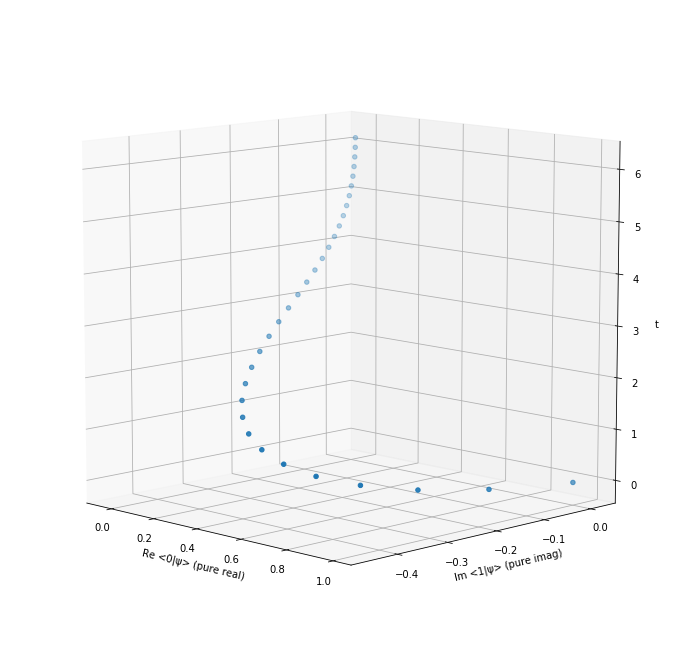

In [80]:
fig = plt.figure(figsize=(12,12))

#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10,-45) # rotate 3d point of view

ax.scatter(
    real_parts0, imag_parts1, times
)

##ax.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')


## Detection event

In [157]:
# Statistics on Page-Wootters qubit vectors (dim=64)

def mean(v, callback=lambda k: k):
    total_weight = 0
    total = 0
    for k in range(32):
        value = callback(k)
        weight = abs(v[k]**2) + abs(v[k+1]**2)
        total_weight += weight
        total += (weight * value)
    return total / total_weight

def mean_of_squares(v):
    return mean(v, callback=lambda k: k**2)

def square_of_mean(v):
    return mean(v)**2

def variance(v):
    return mean_of_squares(v) - square_of_mean(v)

def sigma(v):
    return sqrt(variance(v))

In [158]:
sqr2D = np.array([
    [0, 0],
    [0, 2**(3/4)]
])

In [159]:
qbhistvec = qbhistvec.astype(np.complex)

In [160]:
sqr2D = sqr2D.astype(np.complex)

In [161]:
prob_detect_v = np.kron(np.eye(32), sqr2D) @ qbhistvec
prob_detect_v = prob_detect_v / norm(prob_detect_v)

In [162]:
prob_detect = np.zeros(32)
for t_idx in range(32):
    prob_detect[t_idx] = \
        np.abs(prob_detect_v[2*t_idx])**2 + np.abs(prob_detect_v[2*t_idx+1])**2

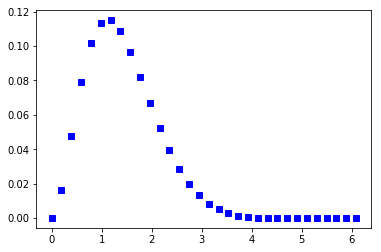

In [163]:
plt.plot(times, prob_detect, 'bs')

In [164]:
detect_fft = \
    np.kron(F, np.eye(2)) @ prob_detect_v
detect_fft = detect_fft / norm(detect_fft)

In [165]:
prob_detect_fft = np.zeros(32)
for o in range(32):
    prob_detect_fft[o] = \
        np.abs(detect_fft[2*o]**2) + \
        np.abs(detect_fft[2*o + 1]**2) 

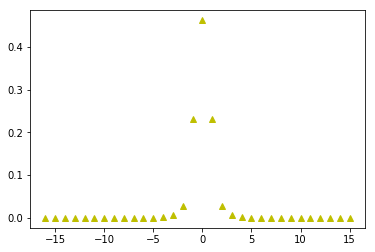

In [196]:
# Arrays are "rolled" because the second half 
# of the spectrum is identified with
# negative frequencies.
plt.plot(range(-16, 16), np.roll(prob_detect_fft, -16), 'y^')

In [167]:
S_t = stats.entropy(prob_detect)

In [168]:
S_omega = stats.entropy(prob_detect_fft)

In [169]:
S_t

In [170]:
S_omega

In [171]:
S_t * S_omega

In [172]:
np.log(32)

In [173]:
(S_t * S_omega - np.log(32)) / np.log(32)

Only 1.8% more than the minumum per entropic uncertainty relation.

In [175]:
sigma(prob_detect_v) * 2 * np.pi / 32

In [197]:
sigma(np.roll(detect_fft, -32))

Uncertainties based on sigmas make less sense for finite distributions;
also: here the time distribution is only for t in (0, 2pi), the negative
semiaxis is missing: although with detection prob=0, it impacts
the frequency distribution.

The frequency distribution is larger here.